<a href="https://colab.research.google.com/github/ARAVINTH342006/ML/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading datasets...
All datasets loaded successfully!
Number of datasets: 5

DATASET INFORMATION

Amazon:
Shape: (5839, 7)
Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date']
First 2 rows:
      Open      High       Low     Close  Adj Close     Volume        Date
0  4.07500  4.478125  3.952344  4.468750   4.468750  322352000  2000-01-03
1  4.26875  4.575000  4.087500  4.096875   4.096875  349748000  2000-01-04
------------------------------

Google:
Shape: (4677, 7)
Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date']
First 2 rows:
       Open      High       Low     Close  Adj Close     Volume        Date
0  2.490664  2.591785  2.390042  2.499133   2.499133  897427216  2004-08-19
1  2.515820  2.716817  2.503118  2.697639   2.697639  458857488  2004-08-20
------------------------------

Microsoft:
Shape: (5839, 7)
Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date']
First 2 rows:
       Open     High     Low     Close  Adj Cl

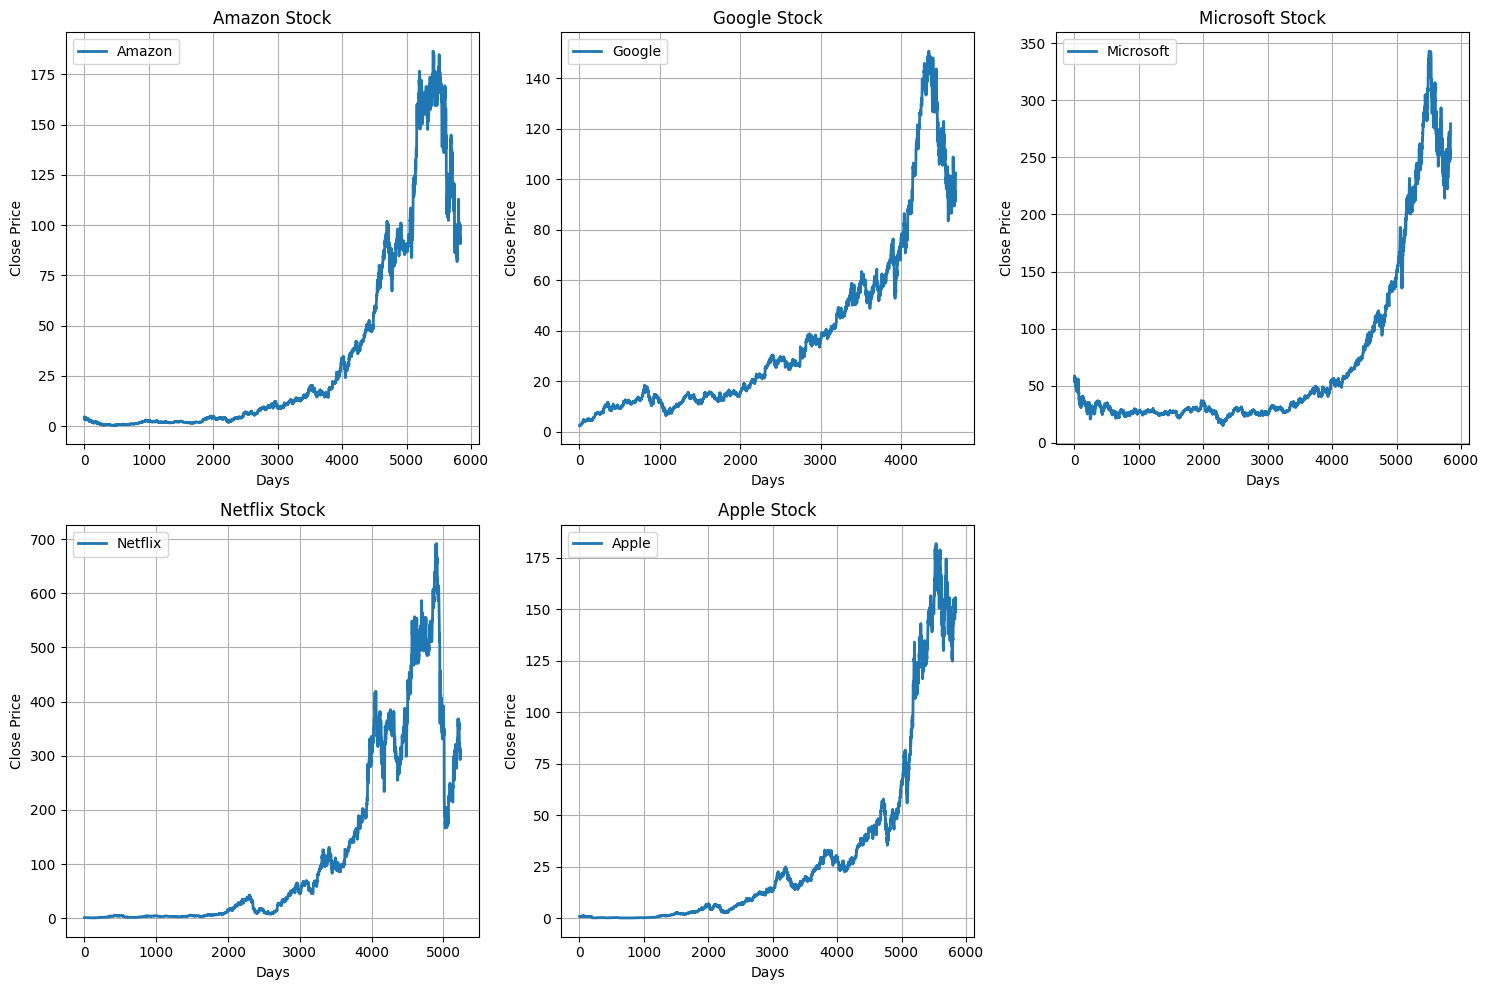


Cleaning data...


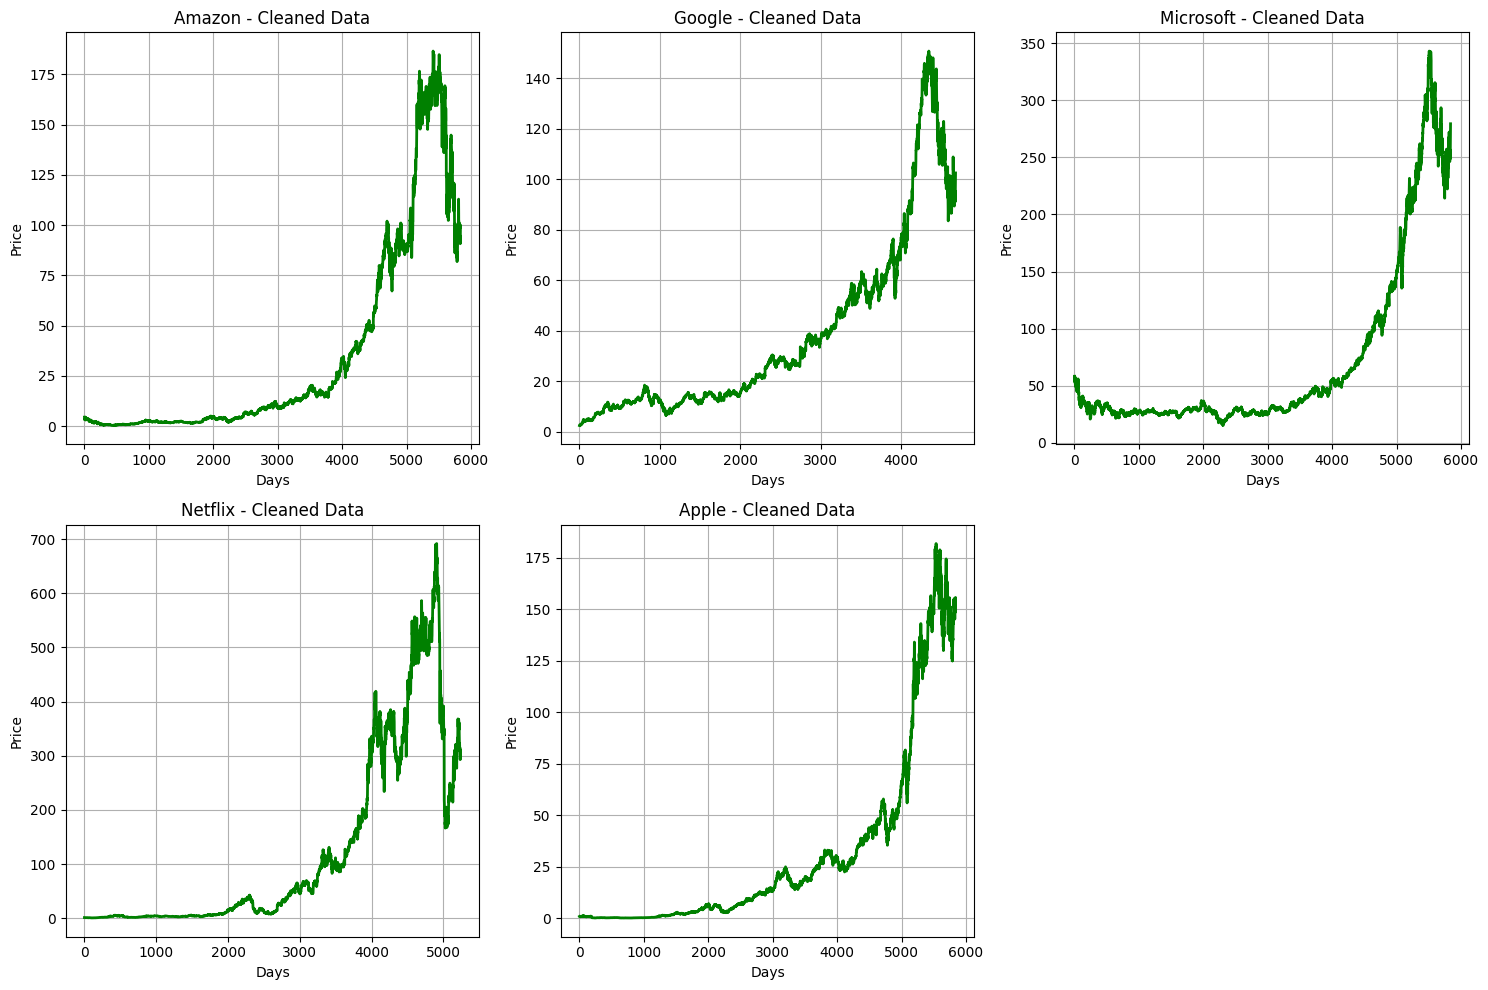


MAKING PREDICTIONS FOR AMAZON STOCK
Using 5839 days of Amazon data for prediction
Created 5832 training samples

Training models...

PREDICTION RESULTS:
Last 5 days prices: [ 92.43000031  94.87999725  96.19999695 100.04000092  98.94999695]

Random Forest Prediction:
  Day 1: $99.08
  Day 2: $99.09

Linear Regression Prediction:
  Day 1: $99.26
  Day 2: $99.04

Model Accuracy (R² score):
Random Forest: 0.9986
Linear Regression: 0.9990


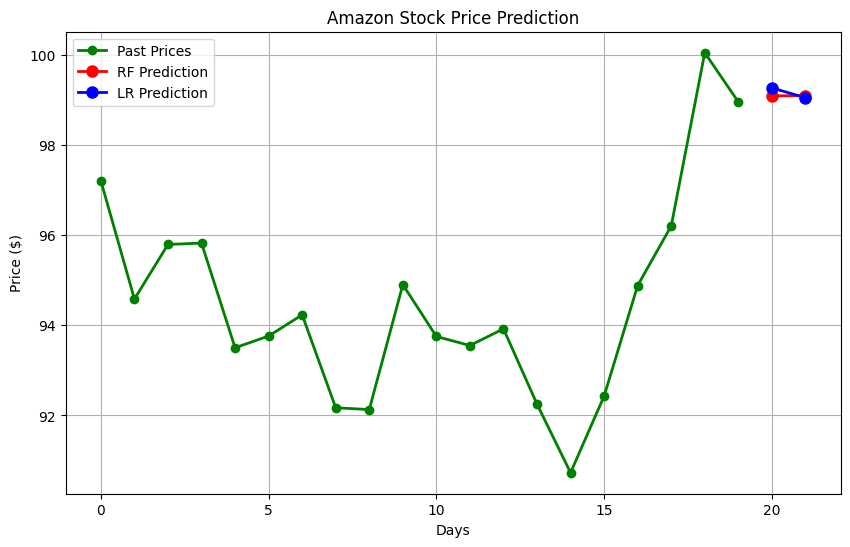


✅ All done! Check the plots above.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print("Loading datasets...")


datasets = {
    'Amazon': pd.read_csv("/content/Amazon.csv"),
    'Google': pd.read_csv("/content/Google.csv"),
    'Microsoft': pd.read_csv("/content/Microsoft.csv"),
    'Netflix': pd.read_csv("/content/Netflix.csv"),
    'Apple': pd.read_csv("/content/Apple.csv")
}


print("All datasets loaded successfully!")
print(f"Number of datasets: {len(datasets)}")


print("\n" + "="*50)
print("DATASET INFORMATION")
print("="*50)

for name, data in datasets.items():
    print(f"\n{name}:")
    print(f"Shape: {data.shape}")
    print(f"Columns: {data.columns.tolist()}")
    print("First 2 rows:")
    print(data.head(2))
    print("-" * 30)

# Plot original data from all datasets
print("\nPlotting original data...")
plt.figure(figsize=(15, 10))

for i, (name, data) in enumerate(datasets.items(), 1):
    plt.subplot(2, 3, i)

    # Try to find price column
    if 'Close' in data.columns:
        plt.plot(data['Close'], label=name, linewidth=2)
        plt.ylabel('Close Price')
    elif 'Price' in data.columns:
        plt.plot(data['Price'], label=name, linewidth=2)
        plt.ylabel('Price')
    elif 'Adj Close' in data.columns:
        plt.plot(data['Adj Close'], label=name, linewidth=2)
        plt.ylabel('Adj Close Price')
    else:
        # Plot first numeric column
        numeric_cols = data.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            plt.plot(data[numeric_cols[0]], label=name, linewidth=2)
            plt.ylabel(numeric_cols[0])

    plt.title(f'{name} Stock')
    plt.xlabel('Days')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


print("\nCleaning data...")
plt.figure(figsize=(15, 10))

for i, (name, data) in enumerate(datasets.items(), 1):
    plt.subplot(2, 3, i)


    data_clean = data.dropna()


    if 'Close' in data_clean.columns:
        prices = data_clean['Close']
    elif 'Price' in data_clean.columns:
        prices = data_clean['Price']
    elif 'Adj Close' in data_clean.columns:
        prices = data_clean['Adj Close']
    else:
        numeric_cols = data_clean.select_dtypes(include=[np.number]).columns
        prices = data_clean[numeric_cols[0]]

    plt.plot(prices, color='green', linewidth=2)
    plt.title(f'{name} - Cleaned Data')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Make predictions for one stock (let's use Amazon)
print("\n" + "="*50)
print("MAKING PREDICTIONS FOR AMAZON STOCK")
print("="*50)

amazon_data = datasets['Amazon'].dropna()
if 'Close' in amazon_data.columns:
    prices = amazon_data['Close']
else:
    numeric_cols = amazon_data.select_dtypes(include=[np.number]).columns
    prices = amazon_data[numeric_cols[0]]

print(f"Using {len(prices)} days of Amazon data for prediction")

# Prepare data for prediction
X = []  # Features (last 5 days)
y = []  # Targets (next 2 days)

for i in range(5, len(prices)-2):
    X.append(prices.iloc[i-5:i].values)  # Last 5 days
    y.append(prices.iloc[i:i+2].values)  # Next 2 days

X = np.array(X)
y = np.array(y)

print(f"Created {len(X)} training samples")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
print("\nTraining models...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()

rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predict next 2 days
last_5_days = prices.iloc[-5:].values.reshape(1, -1)
rf_pred = rf_model.predict(last_5_days)
lr_pred = lr_model.predict(last_5_days)

print("\nPREDICTION RESULTS:")
print(f"Last 5 days prices: {last_5_days[0]}")
print(f"\nRandom Forest Prediction:")
print(f"  Day 1: ${rf_pred[0][0]:.2f}")
print(f"  Day 2: ${rf_pred[0][1]:.2f}")
print(f"\nLinear Regression Prediction:")
print(f"  Day 1: ${lr_pred[0][0]:.2f}")
print(f"  Day 2: ${lr_pred[0][1]:.2f}")

# Simple accuracy check
rf_score = rf_model.score(X_test, y_test)
lr_score = lr_model.score(X_test, y_test)
print(f"\nModel Accuracy (R² score):")
print(f"Random Forest: {rf_score:.4f}")
print(f"Linear Regression: {lr_score:.4f}")

# Plot the prediction
plt.figure(figsize=(10, 6))
# Last 20 days
last_20_days = prices.iloc[-20:]
plt.plot(range(len(last_20_days)), last_20_days.values, 'go-', label='Past Prices', linewidth=2)

# Predictions
future_days = [len(last_20_days), len(last_20_days) + 1]
plt.plot(future_days, rf_pred[0], 'ro-', label='RF Prediction', markersize=8, linewidth=2)
plt.plot(future_days, lr_pred[0], 'bo-', label='LR Prediction', markersize=8, linewidth=2)

plt.title('Amazon Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

print("\nAll done")

In [6]:
print("PREDICTIONS FOR ALL 5 STOCKS:")
print("=" * 40)

for name, data in datasets.items():
    # Clean data
    data_clean = data.dropna()

    # Find price column
    if 'Close' in data_clean.columns:
        prices = data_clean['Close']
    else:
        numeric_cols = data_clean.select_dtypes(include=[np.number]).columns
        prices = data_clean[numeric_cols[0]]

    # Prepare data
    X = []
    y = []
    for i in range(3, len(prices)-2):
        X.append(prices.iloc[i-3:i].values)
        y.append(prices.iloc[i:i+2].values)

    if len(X) > 0:
        # Train model
        model = RandomForestRegressor(n_estimators=50, random_state=42)
        model.fit(X, y)

        # Predict
        last_3_days = prices.iloc[-3:].values.reshape(1, -1)
        prediction = model.predict(last_3_days)

        print(f"\n{name}:")
        print(f"  Last 3 days: {last_3_days[0]}")
        print(f"  Prediction - Day 1: ${prediction[0][0]:.2f}")
        print(f"  Prediction - Day 2: ${prediction[0][1]:.2f}")

PREDICTIONS FOR ALL 5 STOCKS:

Amazon:
  Last 3 days: [ 96.19999695 100.04000092  98.94999695]
  Prediction - Day 1: $98.68
  Prediction - Day 2: $98.04

Google:
  Last 3 days: [ 96.55000305 101.06999969 102.45999908]
  Prediction - Day 1: $102.61
  Prediction - Day 2: $101.24

Microsoft:
  Last 3 days: [265.44000244 276.20001221 279.42999268]
  Prediction - Day 1: $276.90
  Prediction - Day 2: $275.78

Netflix:
  Last 3 days: [303.79000854 310.05999756 303.5       ]
  Prediction - Day 1: $301.94
  Prediction - Day 2: $302.41

Apple:
  Last 3 days: [152.99000549 155.8500061  155.        ]
  Prediction - Day 1: $154.52
  Prediction - Day 2: $152.54
